In [72]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
import waveguides as w
import scipy.constants as const

In [73]:
open3 = np.array([5.5, 10.5, 15.5, 20.5, 25.5, 30.5, 35.5, 40.5, 45.5, 50.5])

In [74]:
shut3 = np.array([3.0, 8.0, 13.0, 18.0, 13.0, 18.0, 23.0, 28.0, 33.0, 38.0, 43.0, 48.0])

In [75]:
coax = [open3, shut3]

In [76]:
open75 = np.array([8.0, 12.4, 16.4])

In [77]:
shut75 = np.array([9.0, 13.1, 17.5])

In [78]:
open775 = np.array([10.1, 14.0, 17.5])

In [79]:
shut775 = np.array([8.5, 12.2, 15.8])

In [80]:
open8 = np.array([8.5, 11.6, 15.0])

In [81]:
shut8 = np.array([8.0, 11.4, 14.6, 18.0])

In [82]:
open825 = np.array([9.9, 13.0, 15.9])

In [83]:
shut825 = np.array([10.3, 13.2, 16.2])

In [84]:
open85 = np.array([8.4, 11.1, 14.0, 16.8])

In [85]:
shut85 = np.array([9.3, 12.0, 14.8, 17.7])

In [86]:
open9 = np.array([8, 10.7, 13.0, 15.0, 17.9])

In [87]:
shut9 = np.array([10.0, 12.7, 15.2, 17.6])

In [88]:
allwaves = [open75, shut75, open775, shut775, open8, shut8, open825, shut825, open85, shut85, open9, shut9]

In [16]:
np.savez('waveguides', open3 = open3, shut3=shut3, open75=open75, shut75=shut75, open775=open775, shut775=shut775, open8=open8, shut8=shut8, open825=open825, shut825=shut825, open85=open85, shut85=shut85, open9=open9, shut9=shut9)

In [18]:
npz = np.load('waveguides.npz')

In [19]:
npz['shut775']

array([  8.5,  12.2,  15.8])

In [21]:
def xm(m, A, l):
    return A + m*l/2

In [22]:
params = []
for array in coax:
    x = np.arange(1,len(array)+1)
    y = array
    params.append(opt.curve_fit(xm, x, y)[0])

[  0.5  10. ]


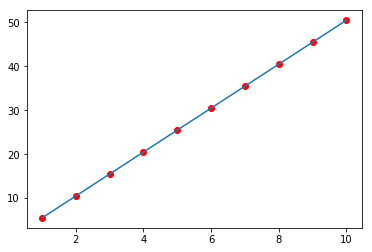

[-1.39393939  7.76223776]


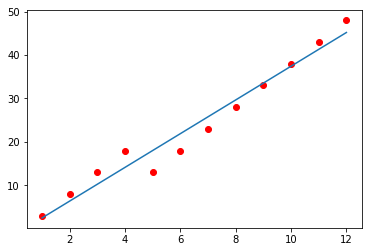

In [23]:
for i in range(len(coax)):
    y = coax[i]
    x = np.arange(1, len(y)+1)
    paramsarr = params[i]
    print(paramsarr)
    plt.plot(x, y, 'ro')
    plt.plot(x, xm(x, paramsarr[0], paramsarr[1]))
    plt.show()

In [24]:
for i in range(1,len(params)+1):
    print('Best Fit Parameters:')
    print(str(i) + 'A:', round(params[i-1][0], 2))
    print(str(i) + 'l', round(params[i-1][1], 2))
    print()

Best Fit Parameters:
1A: 0.5
1l 10.0

Best Fit Parameters:
2A: -1.39
2l 7.76



[  0.5  10. ]


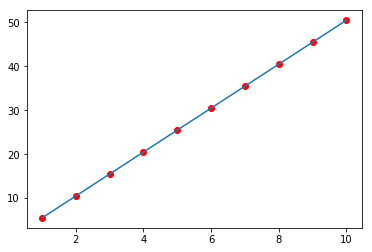

[-1.39393939  7.76223776]


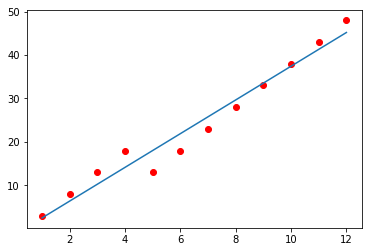

In [25]:
lambda3 = w.find_lambda(coax)

# X-Band Waveguide

In [26]:
def lambdag(lambdafs, a):
    return lambdafs/(1-(lambdafs/(2*a))**2)**(0.5)

[ 3.86666667  8.4       ]


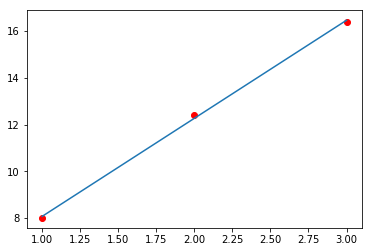

[ 4.7  8.5]


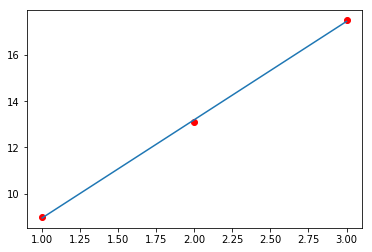

[ 6.46666667  7.4       ]


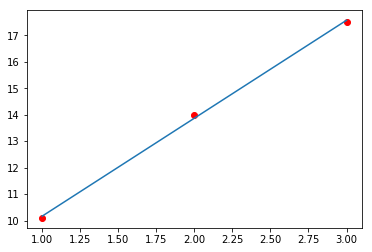

[ 4.86666667  7.3       ]


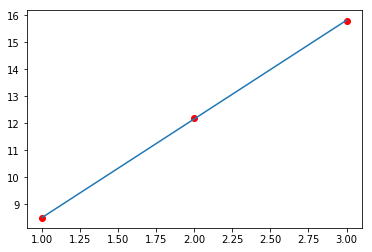

[ 5.2  6.5]


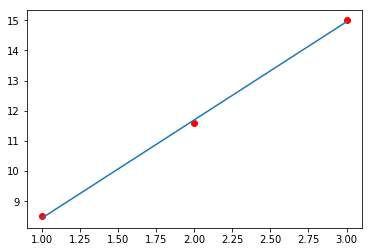

[ 4.7   6.64]


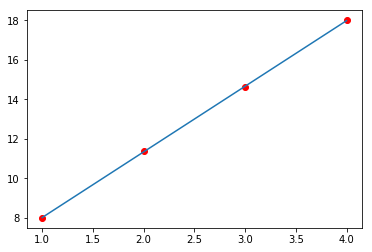

[ 6.93333333  6.        ]


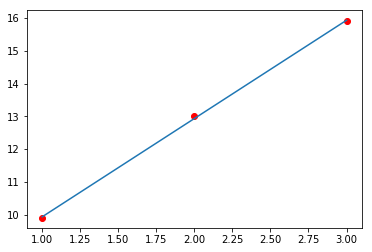

[ 7.33333333  5.9       ]


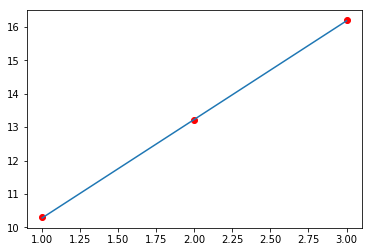

[ 5.55  5.62]


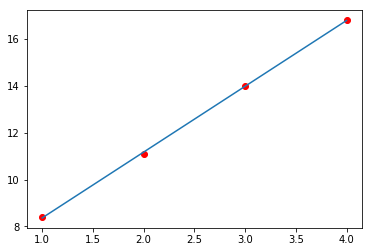

[ 6.45  5.6 ]


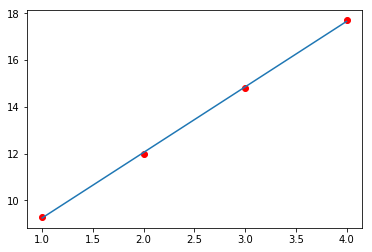

[ 5.69  4.82]


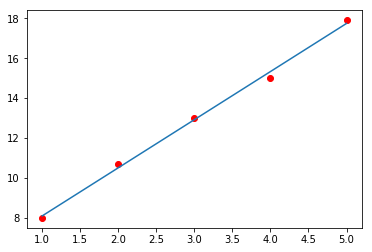

[ 7.55  5.06]


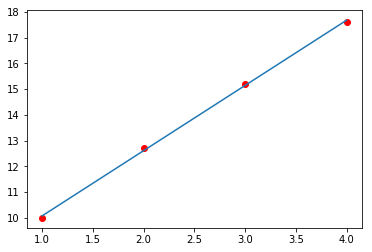

In [27]:
xlambdas = w.find_lambda(allwaves)

In [95]:
freqs = np.array([7.5, 7.5, 7.75, 7.75, 8, 8, 8.25, 8.25, 8.5, 8.5, 9, 9])*10e6

In [96]:
lambdas = const.c/freqs

In [97]:
lambdas

array([ 3.99723277,  3.99723277,  3.86828978,  3.86828978,  3.74740573,
        3.74740573,  3.63384798,  3.63384798,  3.52697009,  3.52697009,
        3.33102731,  3.33102731])

In [98]:
lg = opt.curve_fit(lambdag, lambdas, xlambdas)[0]

/Users/MissaCarlson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  
/Users/MissaCarlson/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:779: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


In [112]:
hfont = {'fontname':'Helvetica'}

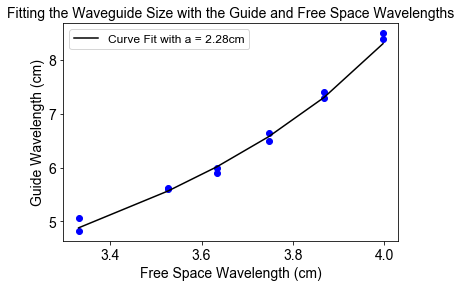

In [140]:
plt.plot(lambdas, xlambdas, 'bo')
plt.plot(lambdas, lambdag(lambdas, 2.28), 'k-', label='Curve Fit with a = 2.28cm')
plt.title('Fitting the Waveguide Size with the Guide and Free Space Wavelengths')
plt.xlabel('Free Space Wavelength (cm)')
plt.ylabel('Guide Wavelength (cm)')
plt.rc('font', size=14)
plt.rc('axes', titlesize=14)
plt.legend(prop = {'size':12})
plt.savefig('WaveguideAFit.png', bbox_inches='tight')
plt.show()
##22.61mm